In [1]:
import pandas as pd

data_path = '/Users/sola/Downloads/open/'

# index_col은 불러올 데이터프레임의 인덱스를 지정하는 파라미터, 열이름을 전달하면 해당 열을 인덱스로 지정한다.
train = pd.read_csv(data_path + 'train.csv', parse_dates=['TIMESTAMP'], dayfirst=True ,infer_datetime_format=True, index_col='PRODUCT_ID')
test = pd.read_csv(data_path + 'test.csv', parse_dates=['TIMESTAMP'], dayfirst=True ,infer_datetime_format=True, index_col='PRODUCT_ID')

submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='PRODUCT_ID')

In [2]:
# 일단 인코딩전에 훈련셋 테스트셋 합치기
train_df = train.drop(['Y_Class','Y_Quality'], axis=1)
all_data = pd.concat([train_df, test])
# all_data = all_data.drop(['TIMESTAMP'], axis =1)

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, TRAIN_000 to TEST_309
Columns: 2878 entries, TIMESTAMP to X_2875
dtypes: datetime64[ns](1), float64(2875), object(2)
memory usage: 19.9+ MB


In [4]:
all_data.isnull().sum()

TIMESTAMP         0
LINE              0
PRODUCT_CODE      0
X_1             316
X_2             316
               ... 
X_2871          770
X_2872          899
X_2873          899
X_2874          899
X_2875          899
Length: 2878, dtype: int64

In [5]:
# 결측치 넣어주기
all_data = all_data.fillna(0)


In [6]:
all_data.isnull().sum()

TIMESTAMP       0
LINE            0
PRODUCT_CODE    0
X_1             0
X_2             0
               ..
X_2871          0
X_2872          0
X_2873          0
X_2874          0
X_2875          0
Length: 2878, dtype: int64

In [7]:
all_data

,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
PRODUCT_ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_000,2022-06-13 05:14:00,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.34,40.89,32.56,34.09,77.77,0.0,0.0,0.0,0.0,0.0
TRAIN_001,2022-06-13 05:22:00,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.89,42.82,43.92,35.34,72.55,0.0,0.0,0.0,0.0,0.0
TRAIN_002,2022-06-13 05:30:00,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.19,36.65,42.47,36.53,78.35,0.0,0.0,0.0,0.0,0.0
TRAIN_003,2022-06-13 05:39:00,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.74,39.17,52.17,30.58,71.78,0.0,0.0,0.0,0.0,0.0
TRAIN_004,2022-06-13 05:47:00,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.70,41.89,46.93,33.09,76.97,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_305,2022-11-05 11:18:00,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,51.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
TEST_306,2022-11-05 16:39:00,T100304,T_31,2.0,96.0,0.0,45.0,11.0,0.0,45.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
TEST_307,2022-11-05 16:47:00,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,50.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [8]:
# TIMESTAMP 처리

# all_data['timestamp_str'] = all_data['TIMESTAMP'].astype(str)
#
# all_data['date']=all_data['timestamp_str'].apply(lambda x:x.split()[0])
#
# all_data['year'] = all_data['timestamp_str'].apply(lambda x:x.split()[0].split('-')[0])
# all_data['month'] = all_data['timestamp_str'].apply(lambda x:x.split()[0].split('-')[1])
# all_data['day'] = all_data['timestamp_str'].apply(lambda x:x.split()[0].split('-')[2])
# all_data['hour'] = all_data['timestamp_str'].apply(lambda x:x.split()[1].split(':')[0])
# all_data['minute'] = all_data['timestamp_str'].apply(lambda x:x.split()[1].split(':')[1])
# all_data['second'] = all_data['timestamp_str'].apply(lambda x:x.split()[1].split(':')[2])


In [9]:
all_data.head()

,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
PRODUCT_ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_000,2022-06-13 05:14:00,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.34,40.89,32.56,34.09,77.77,0.0,0.0,0.0,0.0,0.0
TRAIN_001,2022-06-13 05:22:00,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.89,42.82,43.92,35.34,72.55,0.0,0.0,0.0,0.0,0.0
TRAIN_002,2022-06-13 05:30:00,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.19,36.65,42.47,36.53,78.35,0.0,0.0,0.0,0.0,0.0
TRAIN_003,2022-06-13 05:39:00,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.74,39.17,52.17,30.58,71.78,0.0,0.0,0.0,0.0,0.0
TRAIN_004,2022-06-13 05:47:00,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.70,41.89,46.93,33.09,76.97,0.0,0.0,0.0,0.0,0.0


In [10]:
#요일 피처도..

# from datetime import datetime
# import calendar
#
# all_data['weekday'] = all_data['date'].apply(lambda dateString:calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
#
# all_data


In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline

아래부터.. y_Quality로 y_Class 학습시킨거..

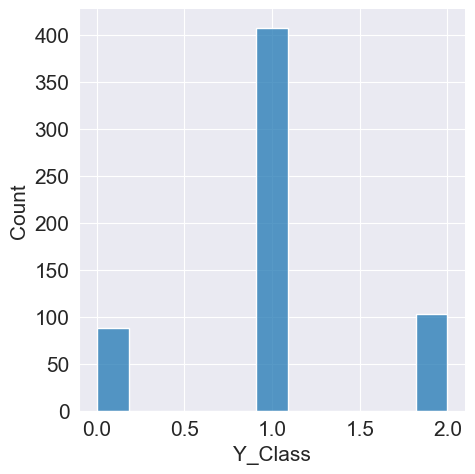

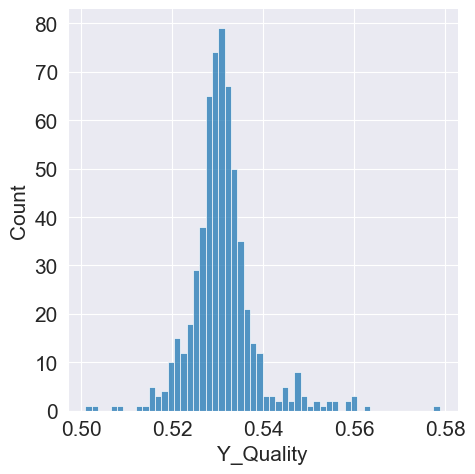

In [12]:
mpl.rc('font',size=15)
sns.displot(train['Y_Class']);
sns.displot(train['Y_Quality']);

In [13]:
ycq = pd.concat([train['Y_Class'], train['Y_Quality']], axis=1)
ycq

,Y_Class,Y_Quality
PRODUCT_ID,,
TRAIN_000,1,0.533433
TRAIN_001,2,0.541819
TRAIN_002,1,0.531267
TRAIN_003,2,0.537325
TRAIN_004,1,0.531590
...,...,...
TRAIN_593,1,0.526546
TRAIN_594,0,0.524022
TRAIN_595,0,0.521289


In [14]:
# 일단 Y_Quality를 Y_Class로 학습시켜둠...??ㅋㅋ
from sklearn.model_selection import train_test_split
x_train = ycq[['Y_Quality']]
y = ycq['Y_Class']

X_train, X_valid, y_train, y_valid = train_test_split(x_train, y, test_size=0.1,stratify=y, random_state=37)

In [15]:
# X_train = X_train.reshape(-1,1)
# y_train =  y_train.reshape(-1,1)

In [16]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=1000, random_state=37)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=37)

In [17]:
lr.predict_proba(X_valid)

array([[0.14660081, 0.68011079, 0.17328839],
       [0.1468989 , 0.68035479, 0.17274631],
       [0.14732123, 0.68069751, 0.17198126],
       [0.14495412, 0.67873117, 0.17631472],
       [0.14670106, 0.68019305, 0.17310589],
       [0.14857297, 0.68169287, 0.16973416],
       [0.14698278, 0.68042314, 0.17259409],
       [0.14730363, 0.6806833 , 0.17201307],
       [0.14691567, 0.68036847, 0.17271586],
       [0.14732495, 0.68070051, 0.17197454],
       [0.14699907, 0.6804364 , 0.17256453],
       [0.14667559, 0.68017217, 0.17315224],
       [0.14799152, 0.68123429, 0.17077419],
       [0.14669751, 0.68019014, 0.17311235],
       [0.14656359, 0.6800802 , 0.17335621],
       [0.14739875, 0.68076004, 0.17184121],
       [0.14571902, 0.67937872, 0.17490227],
       [0.14686648, 0.68032834, 0.17280517],
       [0.14706829, 0.68049267, 0.17243904],
       [0.14705409, 0.68048113, 0.17246478],
       [0.14400678, 0.67791289, 0.17808033],
       [0.1470023 , 0.68043902, 0.17255868],
       [0.

In [18]:
print(lr.coef_)
print(lr.intercept_)

[[-0.77650413]
 [-0.20662604]
 [ 0.98313017]]
[-0.15329048  1.07743722 -0.92414674]


In [19]:
from sklearn import metrics
print("MAE:    ", metrics.mean_absolute_error(y_valid, lr.predict(X_valid)))
print("MSE:    ", metrics.mean_squared_error(y_valid, lr.predict(X_valid)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_valid, lr.predict(X_valid))))

MAE:     0.31666666666666665
MSE:     0.31666666666666665


NameError: name 'np' is not defined

## 시각화해서 이상치 제거할 애들 골라내자...

In [22]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=4, ncols=4)
plt.tight_layout()
figure.set_size_inches(16,12)

sns.barplot(data=train, x='X_1', y='Y_Class', ax = axes[0,0])
sns.barplot(data=train, x='X_2', y='Y_Class', ax = axes[0,1])
sns.barplot(data=train, x='X_3', y='Y_Class', ax = axes[0,2])
sns.barplot(data=train, x='X_4', y='Y_Class', ax = axes[0,3])
sns.barplot(data=train, x='X_5', y='Y_Class', ax = axes[1,0])
sns.barplot(data=train, x='X_6', y='Y_Class', ax = axes[1,1])
sns.barplot(data=train, x='X_7', y='Y_Class', ax = axes[1,2])
sns.barplot(data=train, x='X_8', y='Y_Class', ax = axes[1,3])
sns.barplot(data=train, x='X_9', y='Y_Class', ax = axes[2,0])
sns.barplot(data=train, x='X_10', y='Y_Class', ax = axes[2,1])
sns.barplot(data=train, x='X_11', y='Y_Class', ax = axes[2,2])
sns.barplot(data=train, x='X_12', y='Y_Class', ax = axes[2,3])
sns.barplot(data=train, x='X_13', y='Y_Class', ax = axes[3,0])
sns.barplot(data=train, x='X_14', y='Y_Class', ax = axes[3,1])
sns.barplot(data=train, x='X_15', y='Y_Class', ax = axes[3,2])
sns.barplot(data=train, x='X_16', y='Y_Class', ax = axes[3,3])

<AxesSubplot:xlabel='X_16', ylabel='Y_Class'>

In [ ]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=4, ncols=4)
plt.tight_layout()
figure.set_size_inches(16,12)

for i in range(1,2876):
    co = 'X_'+str(i)

sns.barplot(data=train, x='X_1', y='Y_Class', ax = axes[0,0])
sns.barplot(data=train, x='X_2', y='Y_Class', ax = axes[0,1])
sns.barplot(data=train, x='X_3', y='Y_Class', ax = axes[0,2])
sns.barplot(data=train, x='X_4', y='Y_Class', ax = axes[0,3])
sns.barplot(data=train, x='X_5', y='Y_Class', ax = axes[1,0])
sns.barplot(data=train, x='X_6', y='Y_Class', ax = axes[1,1])
sns.barplot(data=train, x='X_7', y='Y_Class', ax = axes[1,2])
sns.barplot(data=train, x='X_8', y='Y_Class', ax = axes[1,3])
sns.barplot(data=train, x='X_9', y='Y_Class', ax = axes[2,0])
sns.barplot(data=train, x='X_10', y='Y_Class', ax = axes[2,1])
sns.barplot(data=train, x='X_11', y='Y_Class', ax = axes[2,2])
sns.barplot(data=train, x='X_12', y='Y_Class', ax = axes[2,3])
sns.barplot(data=train, x='X_13', y='Y_Class', ax = axes[3,0])
sns.barplot(data=train, x='X_14', y='Y_Class', ax = axes[3,1])
sns.barplot(data=train, x='X_15', y='Y_Class', ax = axes[3,2])
sns.barplot(data=train, x='X_16', y='Y_Class', ax = axes[3,3])

In [ ]:
train = train.fillna(0)

In [ ]:
# 모든 값이 0인 피처 지울거임..
wrong = []
for i in range(1,2876):
    ch = 'X_'+str(i)
    if train[ch].mean() == 0:
        wrong.append(ch)

print(wrong)
print(len(wrong))

In [ ]:
train = train.drop(wrong, axis=1)
train

In [ ]:
X_train =  train.drop(['Y_Class', 'Y_Quality','TIMESTAMP','LINE','PRODUCT_CODE'], axis=1)
y = train['Y_Class']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.3,stratify=y, random_state=37)

In [ ]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=1000, random_state=37)
lr.fit(X_train, y_train)

In [ ]:
print(lr.coef_)
print(lr.intercept_)

In [ ]:
from sklearn import metrics
print("MAE:    ", metrics.mean_absolute_error(y_valid, lr.predict(X_valid)))
print("MSE:    ", metrics.mean_squared_error(y_valid, lr.predict(X_valid)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_valid, lr.predict(X_valid))))

In [ ]:
# 사이킷런 1.0 버전 아래에서는 다음 라인의 주석을 해제하고 실행하세요.
# from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True, n_jobs=-1)
# print(np.mean(scores['train_score']), np.mean(scores['test_score']))
#0.9321723946453317 0.8801241948619236


from sklearn.inspection import permutation_importance
hgb.fit(X_train, y_train)
#permutation_importance는 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지를 관찰하여 어떤 특성이 중요한지 계산한다.
#n_repeats 매개변수는 랜덤하게 섞을 횟수를 지정한다.
result = permutation_importance(hgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
result.importances_mean
#[0.08876275 0.23438522 0.08027708]


# result = permutation_importance(hgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
# print(result.importances_mean)
#[0.05969231 0.20238462 0.049     ]


# hgb.score(X_train, y_train)
#0.8723076923076923